In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set(style = "darkgrid")

In [4]:
df = pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

Text(0.5, 1.0, 'Średnia ilość rezerwacji w danym miesiącu')

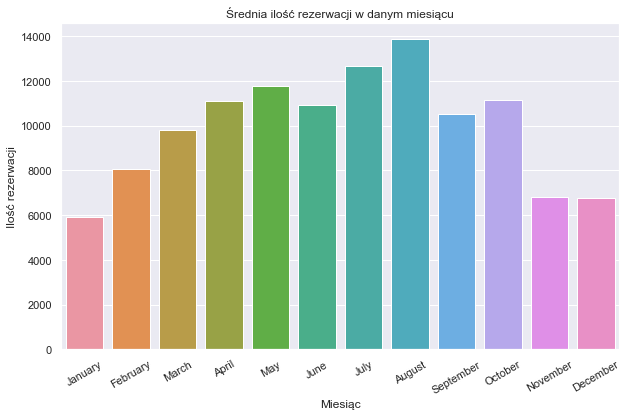

In [7]:
d = df.groupby("arrival_date_month")["arrival_date_month"].count()
plt.figure(figsize=(10,6))
sns.barplot(x=d.index, y=d, order=months)
p = plt.xticks(rotation=30)
plt.xlabel("Miesiąc")
plt.ylabel("Ilość rezerwacji")
plt.title("Średnia ilość rezerwacji w danym miesiącu")

In [8]:
df2 = df.drop(df[df['adr']==5400].index, axis=0, inplace=False)
d = df2.groupby(['hotel', 'arrival_date_month'])['adr'].mean().reset_index()
d['arrival_date_month'] = pd.Categorical(d['arrival_date_month'], categories=months, ordered=True)
d.sort_values('arrival_date_month', inplace=True)

Text(0.5, 1.0, 'Średnia dzienna cena pokoju na miesiąc')

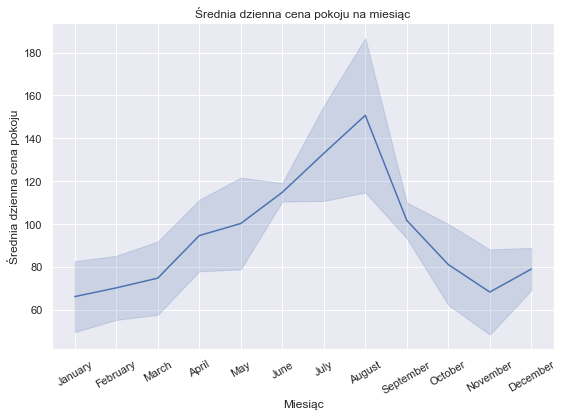

In [10]:
plt.figure(figsize=(9,6))
sns.lineplot(x='arrival_date_month', y='adr', data=d)
plt.ylabel("Średnia dzienna cena pokoju")
plt.xlabel("Miesiąc")
p = plt.xticks(rotation=30)
plt.title("Średnia dzienna cena pokoju na miesiąc")

Text(0, 0.5, 'Ilość rezerwacji')

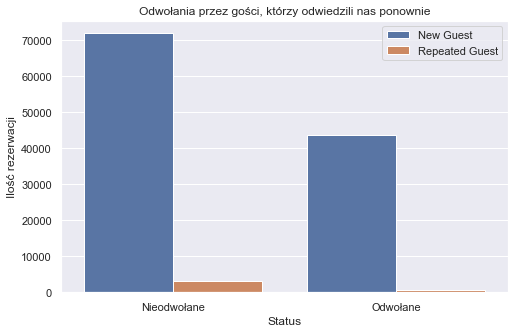

In [45]:
plt.figure(figsize=(8,5))
sns.countplot(x = "is_canceled", hue = 'is_repeated_guest', data = df)
plt.legend(['New Guest', 'Repeated Guest'])
plt.xticks(ticks=[0,1], labels=['Nieodwołane', 'Odwołane'])
plt.title("Odwołania przez gości, którzy odwiedzili nas ponownie")
plt.xlabel("Status")
plt.ylabel("Ilość rezerwacji")

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

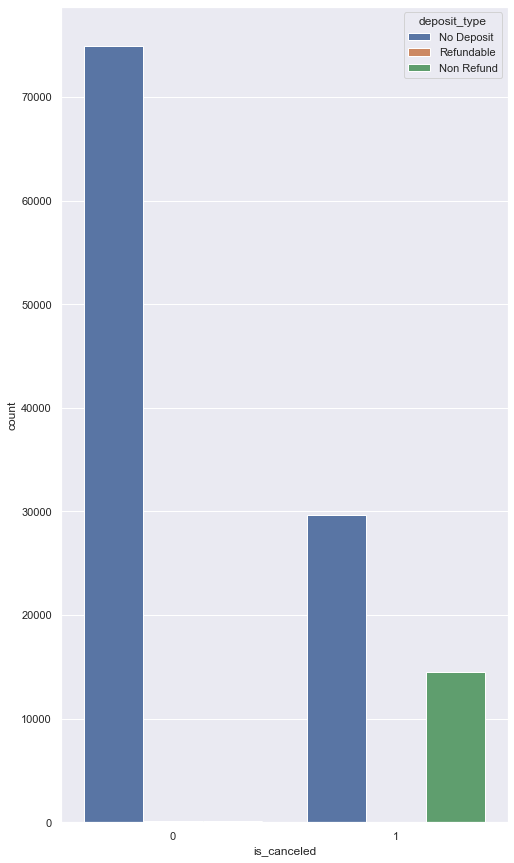

In [20]:
plt.figure(figsize=(8,15))
sns.countplot(x = "is_canceled", hue = 'deposit_type', data = df)
# plt.legend(['New Guest', 'Repeated Guest'])
# plt.xticks(ticks=[0,1], labels=['Nieodwołane', 'Odwołane'])
# plt.title("Odwołania przez gości, którzy odwiedzili nas ponownie")
# plt.xlabel("Status")
# plt.ylabel("Ilość rezerwacji")

In [49]:
df[["is_canceled",'deposit_type', "arrival_date_month"]].groupby(by=["is_canceled",'deposit_type']).count()
# data = {"is_canceled": [0,0,0,1,1,1],
#         "deposit_type":['No Deposit', 'Non Refund', 'Refundable', 'No Deposit', 'Non Refund', 'Refundable'],
#         "count": [74947, 93, 126, 29694, 14494, 36]}
# data = pd.DataFrame(data)
# data

# plt.figure(figsize=(10,5))
# px.bar(data, x = "is_canceled", y = "count", color='deposit_type', barmode='group', labels={
#                      "is_canceled": "Status",
#                      "count": "Ilość rezerwacji",
#                      'deposit_type': "Rodzaj zaliczki"
#                  },title="Iolość rezerwacji w zależności od rodzaju zaliczki")


arrival_date_month
is_canceled deposit_type                    
0           No Deposit                 74947
            Non Refund                    93
            Refundable                   126
1           No Deposit                 29694
            Non Refund                 14494
            Refundable                    36